In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('LIFE.Merged.D.A.November.11.2024.csv')
df.head()

,V1,MaskID,Time,TimeN,days_accel,valid_days,minutes_wear,minutes_nonwear,activity_total,steps_total,...,ZhST,SEX,filter_$,ZTGR1,ZTGR2,ZTQWB,Zst,Zmin760,HEI,ZLDL_CHOL_CALCULATION
0,0,10020,SV1,1,-10,6,711.1666667,642.3333333,102872.5,2634.833333,...,,1,0,,,,.0370951100477844,.518077178394756,.805555555555555,.820680712745175
1,1,10020,F06,2,176,4,726.75,713.25,63984,1641,...,,1,0,,,,-.605569253582551,-.135199648159411,,.820680712745175
2,2,10020,F12,3,358,5,717.8,609.4,81706.6,1760,...,-.215581911842835,1,1,.342943633391193,.381572466155057,.557505878977451,-.528617659454433,-.249706597558682,,.820680712745175
3,3,10020,F18,4,,,,,,,...,,1,0,,,,,,,.820680712745175
4,4,10020,F24,5,714,1,815,625,129339,3475,...,-.372883789871789,1,0,,,,.580390608862548,.1290471581466,,.820680712745175


In [5]:
relevant_columns = ['SODIUM', 'POTASSIUM', 'CALCIUM', 'CHLORIDE', 'CARBON_DIOXIDE_CO2',
                    'GLUCOSE', 'CHOLESTEROL_TOTAL', 'HDL_CHOL_DIRECT', 'LDL_CHOL_CALCULATION', 
                    'TRIGLYCERIDES', 'ALBUMIN', 'GLOBULIN', 'A_G_RATIO', 'UREA_NITROGEN',
                    'HEMOGLOBIN', 'RED_CELL_COUNT', 'HEMATOCRIT']

for col in relevant_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, invalid data to NaN

In [6]:
def score_binary(value, lower, upper):
    """Returns 1 if the value is within the healthy range, else 0."""
    if pd.isnull(value):  # Missing values
        return None
    return 1 if lower <= value <= upper else 0

In [7]:
# Reference ranges for scoring
reference_ranges = {
    'SODIUM': (135, 145), 'POTASSIUM': (3.5, 5.0), 'CALCIUM': (8.5, 10.5),
    'CHLORIDE': (98, 106), 'CARBON_DIOXIDE_CO2': (22, 29),
    'GLUCOSE': (70, 99), 'CHOLESTEROL_TOTAL': (0, 200), 'HDL_CHOL_DIRECT': (40, 100),
    'LDL_CHOL_CALCULATION': (0, 100), 'TRIGLYCERIDES': (0, 150),
    'ALBUMIN': (3.4, 5.4), 'GLOBULIN': (2.0, 3.5), 'A_G_RATIO': (1.0, 2.0),
    'UREA_NITROGEN': (7, 20), 'HEMOGLOBIN': (13.5, 17.5), 'RED_CELL_COUNT': (4.7, 6.1),
    'HEMATOCRIT': (38.8, 50.0)
}

# Scoring each variable
scores = pd.DataFrame()
for var, (lower, upper) in reference_ranges.items():
    scores[var] = df[var].apply(score_binary, args=(lower, upper))

In [8]:
# Group variables into components
components = {
    'Electrolytes': ['SODIUM', 'POTASSIUM', 'CALCIUM', 'CHLORIDE', 'CARBON_DIOXIDE_CO2'],
    'Glucose': ['GLUCOSE'],
    'Lipid Profile': ['CHOLESTEROL_TOTAL', 'HDL_CHOL_DIRECT', 'LDL_CHOL_CALCULATION', 'TRIGLYCERIDES'],
    'Protein Status': ['ALBUMIN', 'GLOBULIN', 'A_G_RATIO'],
    'Kidney Function': ['UREA_NITROGEN'],
    'Blood Markers': ['HEMOGLOBIN', 'RED_CELL_COUNT', 'HEMATOCRIT']
}

# Average scores for each component
component_scores = {}
for category, variables in components.items():
    component_scores[category] = scores[variables].mean(axis=1)

# Combine into a single DataFrame
component_scores_df = pd.DataFrame(component_scores)

In [9]:
# Final index
component_scores_df['Nutrition_Ingestion_Index'] = component_scores_df.mean(axis=1)

In [10]:
component_scores_df.to_csv('Nutrition_Ingestion_Index_Scores.csv', index=False)
print("File saved: Nutrition_Ingestion_Index_Scores.csv")

File saved: Nutrition_Ingestion_Index_Scores.csv


In [11]:
# Display the first few rows of scores
print(scores.head())

   SODIUM  POTASSIUM  CALCIUM  CHLORIDE  CARBON_DIOXIDE_CO2  GLUCOSE  \
0     1.0        1.0      1.0       1.0                 1.0      1.0   
1     1.0        1.0      1.0       1.0                 1.0      1.0   
2     1.0        1.0      1.0       1.0                 1.0      1.0   
3     1.0        1.0      1.0       1.0                 1.0      1.0   
4     1.0        1.0      1.0       1.0                 1.0      1.0   

   CHOLESTEROL_TOTAL  HDL_CHOL_DIRECT  LDL_CHOL_CALCULATION  TRIGLYCERIDES  \
0                0.0              1.0                   0.0            1.0   
1                0.0              1.0                   0.0            1.0   
2                0.0              1.0                   0.0            1.0   
3                0.0              1.0                   0.0            1.0   
4                0.0              1.0                   0.0            1.0   

   ALBUMIN  GLOBULIN  A_G_RATIO  UREA_NITROGEN  HEMOGLOBIN  RED_CELL_COUNT  \
0      1.0       1.0

In [12]:
# Check for missing values
print(df[relevant_columns].isnull().sum())

SODIUM                  2272
POTASSIUM               2283
CALCIUM                 2283
CHLORIDE                2272
CARBON_DIOXIDE_CO2      2283
GLUCOSE                 2272
CHOLESTEROL_TOTAL       2266
HDL_CHOL_DIRECT         2266
LDL_CHOL_CALCULATION    2288
TRIGLYCERIDES           2266
ALBUMIN                 2272
GLOBULIN                2272
A_G_RATIO               2272
UREA_NITROGEN           2272
HEMOGLOBIN              2567
RED_CELL_COUNT          2567
HEMATOCRIT              2567
dtype: int64


In [13]:
# Filter rows where SODIUM is scored as 1
print(df.loc[scores['SODIUM'] == 1, ['SODIUM']])

       SODIUM
0       142.0
1       142.0
2       142.0
3       142.0
4       142.0
...       ...
10280   142.0
10281   142.0
10284   138.0
10285   138.0
10286   138.0

[7743 rows x 1 columns]


In [14]:
# Filter rows where SODIUM is scored as 0
print(df.loc[scores['SODIUM'] == 0, ['SODIUM']])

       SODIUM
92      146.0
93      146.0
94      146.0
95      146.0
96      146.0
...       ...
10149   146.0
10157   146.0
10158   146.0
10159   146.0
10160   146.0

[272 rows x 1 columns]


In [15]:
# Filter rows where SODIUM is missing
print(df.loc[scores['SODIUM'].isnull(), ['SODIUM']])

       SODIUM
5         NaN
6         NaN
21        NaN
24        NaN
31        NaN
...       ...
10267     NaN
10268     NaN
10275     NaN
10282     NaN
10283     NaN

[2272 rows x 1 columns]


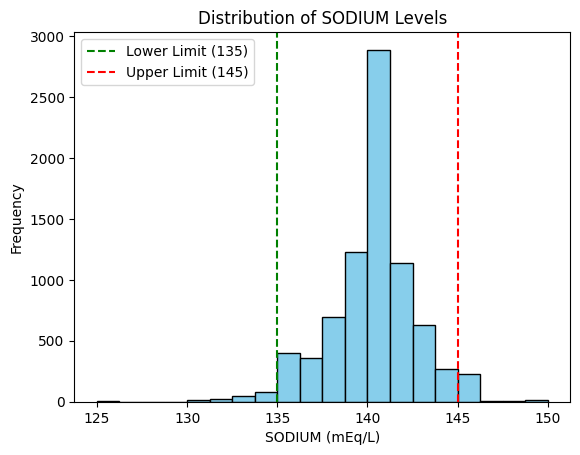

In [16]:
import matplotlib.pyplot as plt

# Plot a histogram for SODIUM
plt.hist(df['SODIUM'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=135, color='green', linestyle='--', label='Lower Limit (135)')
plt.axvline(x=145, color='red', linestyle='--', label='Upper Limit (145)')
plt.title('Distribution of SODIUM Levels')
plt.xlabel('SODIUM (mEq/L)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [17]:
# Summarize scores for each variable
summary = scores.apply(lambda x: pd.Series({
    'Within Range (1)': (x == 1).sum(),
    'Outside Range (0)': (x == 0).sum(),
    'Missing (NaN)': x.isnull().sum()
}))

print(summary)

                   SODIUM  POTASSIUM  CALCIUM  CHLORIDE  CARBON_DIOXIDE_CO2  \
Within Range (1)     7743       7774     7830      6622                6603   
Outside Range (0)     272        230      174      1393                1401   
Missing (NaN)        2272       2283     2283      2272                2283   

                   GLUCOSE  CHOLESTEROL_TOTAL  HDL_CHOL_DIRECT  \
Within Range (1)      4278               5844             7215   
Outside Range (0)     3737               2177              806   
Missing (NaN)         2272               2266             2266   

                   LDL_CHOL_CALCULATION  TRIGLYCERIDES  ALBUMIN  GLOBULIN  \
Within Range (1)                   4971           6055     7977      7668   
Outside Range (0)                  3028           1966       38       347   
Missing (NaN)                      2288           2266     2272      2272   

                   A_G_RATIO  UREA_NITROGEN  HEMOGLOBIN  RED_CELL_COUNT  \
Within Range (1)        7676      

In [20]:
def interpret_index(score):
    """Return an interpretation based on the final index score."""
    if score >= 0.8:
        return 'Excellent'
    elif score >= 0.6:
        return 'Good'
    elif score >= 0.4:
        return 'Average'
    else:
        return 'Poor'

In [22]:
# Add interpretation to the DataFrame
component_scores_df['Interpretation'] = component_scores_df['Nutrition_Ingestion_Index'].apply(interpret_index)

# Save Results to a CSV File
component_scores_df.to_csv('Dp_Nutrition_Ingestion_Index_Scores.csv', index=False)
print("Results saved to Dp_Nutrition_Ingestion_Index_Scores.csv")

Results saved to Dp_Nutrition_Ingestion_Index_Scores.csv


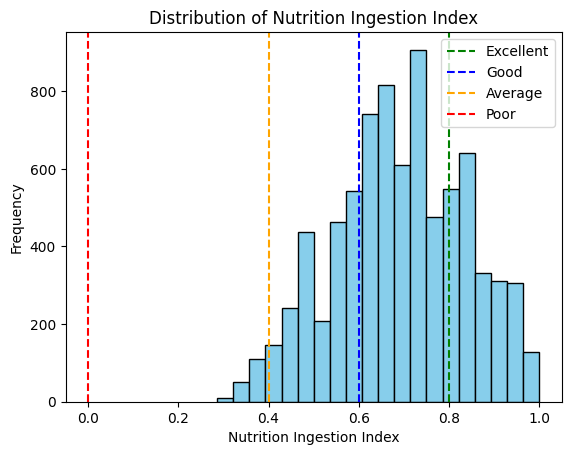

In [23]:
# Plot histogram of the Nutrition Ingestion Index
plt.hist(component_scores_df['Nutrition_Ingestion_Index'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Nutrition Ingestion Index')
plt.xlabel('Nutrition Ingestion Index')
plt.ylabel('Frequency')
plt.axvline(x=0.8, color='green', linestyle='--', label='Excellent')
plt.axvline(x=0.6, color='blue', linestyle='--', label='Good')
plt.axvline(x=0.4, color='orange', linestyle='--', label='Average')
plt.axvline(x=0.0, color='red', linestyle='--', label='Poor')
plt.legend()
plt.show()


In [26]:
# Categorize the Nutrition Ingestion Index into Excellent, Good, Average, and Poor
def interpret_index(score):
    if score >= 0.8:
        return 'Excellent'
    elif score >= 0.6:
        return 'Good'
    elif score >= 0.4:
        return 'Average'
    else:
        return 'Poor'

# Apply the interpretation function to categorize individuals
component_scores_df['Category'] = component_scores_df['Nutrition_Ingestion_Index'].apply(interpret_index)

# Calculate the percentage of individuals in each category
category_summary = component_scores_df['Category'].value_counts(normalize=True) * 100

# Print the summary in the desired format
print("### Nutrition Ingestion Index Summary ###")
for category, percent in category_summary.items():
    print(f"{category}: {percent:.2f}%")

### Nutrition Ingestion Index Summary ###
Good: 39.47%
Poor: 23.70%
Average: 18.62%
Excellent: 18.22%


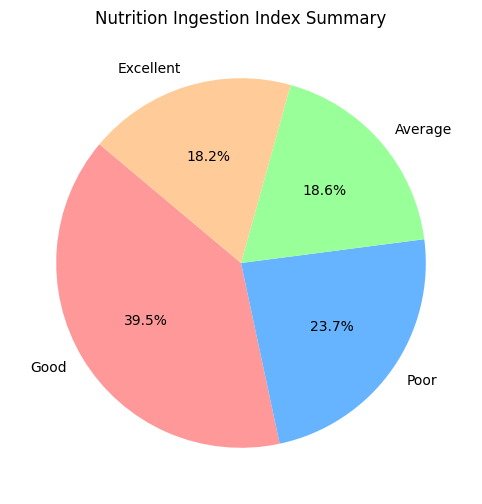

In [27]:
import matplotlib.pyplot as plt

# Plot the Nutrition Ingestion Index categories as a pie chart
category_summary = component_scores_df['Category'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
plt.pie(category_summary, labels=category_summary.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Nutrition Ingestion Index Summary")
plt.show()

In [28]:
import pandas as pd

# Create the Nutrition Ingestion Index Summary data
data = {
    "Category": ["Good", "Poor", "Average", "Excellent"],
    "Percentage": [39.47, 23.70, 18.62, 18.22],
    "Interpretation": [
        "The largest portion of the population has adequate nutrition, but minor improvements can enhance overall health.",
        "A significant proportion of individuals have notable nutritional deficiencies and may require immediate intervention.",
        "These individuals show moderate nutritional imbalances that could improve with targeted dietary adjustments.",
        "A smaller proportion of individuals demonstrate excellent overall nutrition."
    ]
}

# Convert the data to a DataFrame
summary_df = pd.DataFrame(data)

# Display the table
print("### Nutrition Ingestion Index Summary ###")
print(summary_df.to_string(index=False))

# Save the table to a CSV file
summary_df.to_csv('Nutrition_Index_Summary_Table.csv', index=False)

### Nutrition Ingestion Index Summary ###
 Category  Percentage                                                                                                        Interpretation
     Good       39.47      The largest portion of the population has adequate nutrition, but minor improvements can enhance overall health.
     Poor       23.70 A significant proportion of individuals have notable nutritional deficiencies and may require immediate intervention.
  Average       18.62          These individuals show moderate nutritional imbalances that could improve with targeted dietary adjustments.
Excellent       18.22                                          A smaller proportion of individuals demonstrate excellent overall nutrition.
